<a href="https://colab.research.google.com/github/Rishitha2805/Outbreak-Prediction-of-Covid-19-in-INDIA/blob/main/ML_project_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files 
uploaded=files.upload()

Saving Untitled spreadsheet.csv to Untitled spreadsheet.csv


In [ ]:
# importing the required libraries
import pandas as pd
import numpy as np
# Visualisation libraries
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
import datetime
import operator
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error,confusion_matrix
plt.style.use('fivethirtyeight')
# Manipulating the default plot size
# plt.rcParams['figure.figsize'] = 10, 12
 
# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Untitled spreadsheet.csv',parse_dates=['Date'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)
df

,Country,Date,Confirmed,Deaths,Recovered,Active
0,India,2020-01-01,0,0,0,0
1,India,2020-01-02,0,0,0,0
2,India,2020-01-03,0,0,0,0
3,India,2020-01-04,0,0,0,0
4,India,2020-01-05,0,0,0,0
...,...,...,...,...,...,...
175,India,2020-06-24,473105,14894,271697,186514
176,India,2020-06-25,490401,15301,285637,189463
177,India,2020-06-26,508953,15685,295881,197387
178,India,2020-06-27,528859,16095,309713,203051


In [ ]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [ ]:
confirmed

,Date,Confirmed
0,2020-01-01,0
1,2020-01-02,0
2,2020-01-03,0
3,2020-01-04,0
4,2020-01-05,0
...,...,...
174,2020-06-24,473105
175,2020-06-25,490401
176,2020-06-26,508953
177,2020-06-27,528859


In [ ]:
recovered

,Date,Recovered
0,2020-01-01,0
1,2020-01-02,0
2,2020-01-03,0
3,2020-01-04,0
4,2020-01-05,0
...,...,...
174,2020-06-24,271697
175,2020-06-25,285637
176,2020-06-26,295881
177,2020-06-27,309713


In [ ]:
deaths

,Date,Deaths
0,2020-01-01,0
1,2020-01-02,0
2,2020-01-03,0
3,2020-01-04,0
4,2020-01-05,0
...,...,...
174,2020-06-24,14894
175,2020-06-25,15301
176,2020-06-26,15685
177,2020-06-27,16095


In [ ]:
dates=list(confirmed['Date'])
len(dates)

179

In [ ]:
Y_confirmed=list(confirmed.iloc[:,-1].values)
Y_deaths=list(deaths.iloc[:,-1].values)
Y_recovered=list(recovered.iloc[:,-1].values)

In [ ]:
X=np.array([i for i in range(len(dates))]).reshape(-1,1)
Y_confirmed=np.array(Y_confirmed).reshape(-1,1)
Y_deaths=np.array(Y_deaths).reshape(-1,1)
Y_recovered=np.array(Y_recovered).reshape(-1,1)

In [ ]:
days_in_future=20
future_forecast=np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates=future_forecast[:-20]
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

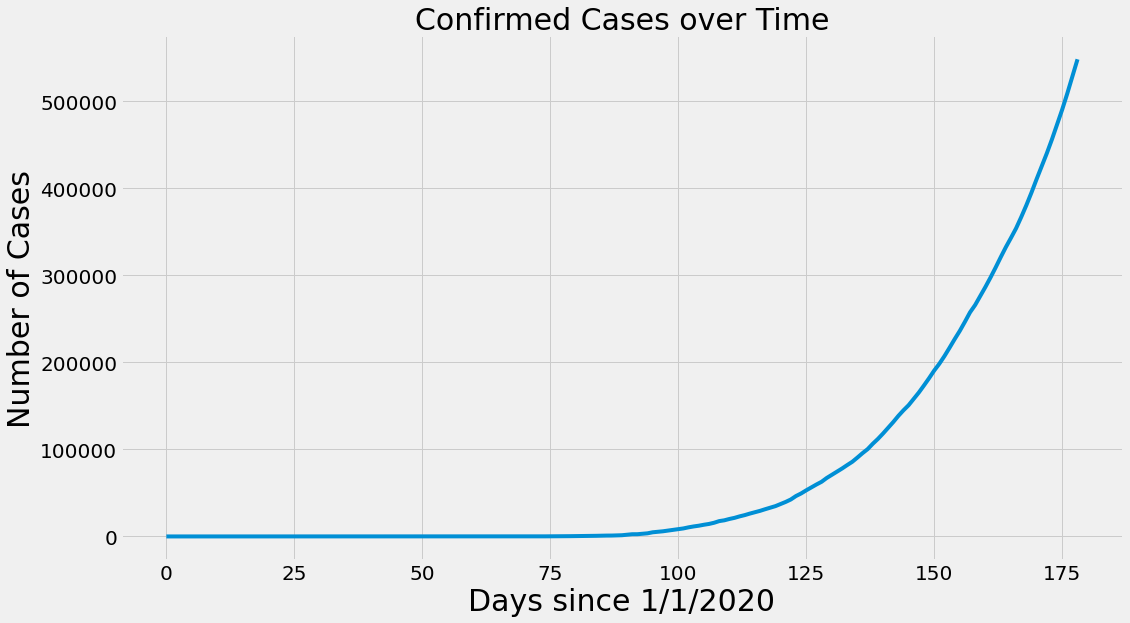

In [ ]:
adjusted_dates=adjusted_dates.reshape(1,-1)[0]
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,Y_confirmed)
plt.title('Confirmed Cases over Time',size=30)
plt.xlabel('Days since 1/1/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

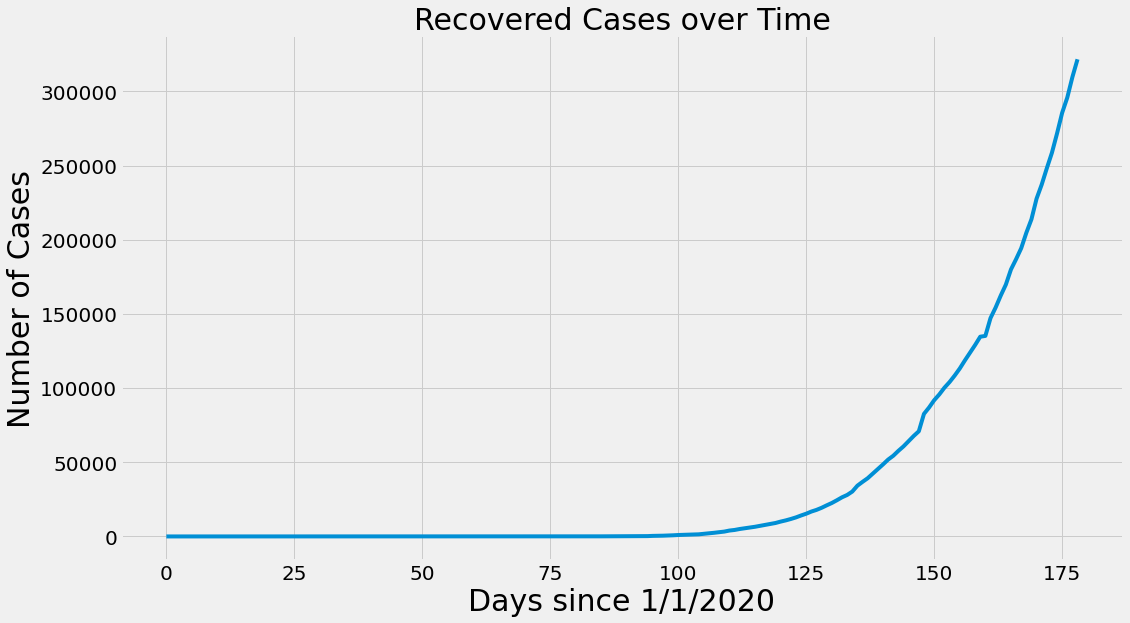

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,Y_recovered)
plt.title('Recovered Cases over Time',size=30)
plt.xlabel('Days since 1/1/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

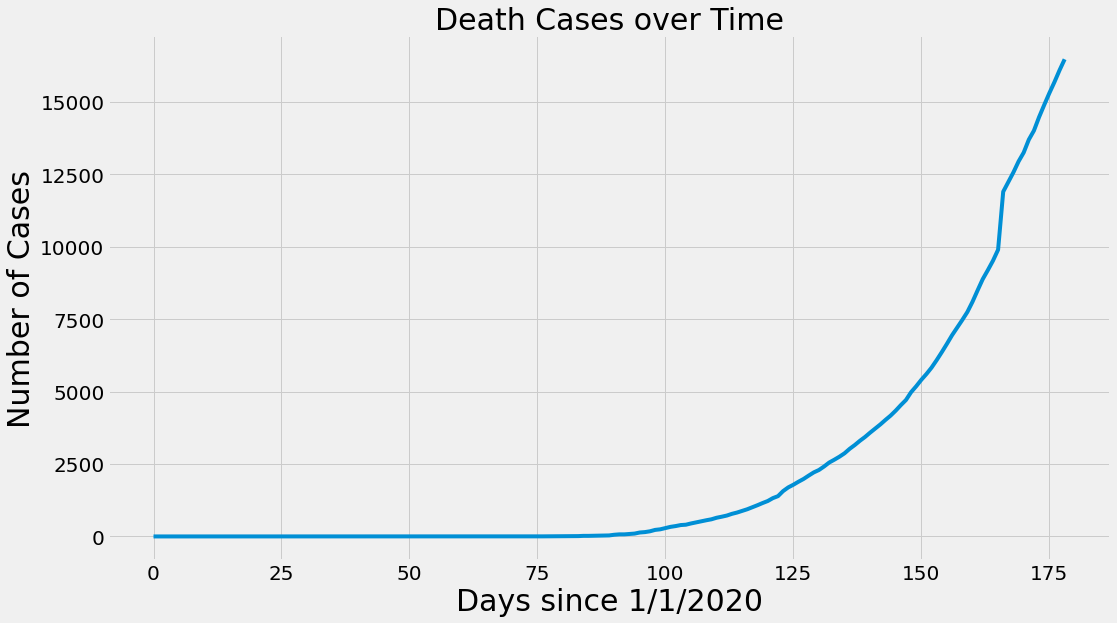

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,Y_deaths)
plt.title('Death Cases over Time',size=30)
plt.xlabel('Days since 1/1/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
print(len(X),len(Y_confirmed))

179 179


In [ ]:
start='2020-01-01'
start_date=datetime.datetime.strptime(start,'%Y-%m-%d')
future_forecast_dates=[]
for i in range(len(future_forecast)):
  future_forecast_dates.append((start_date+datetime.timedelta(days=i)).strftime('%Y-%m-%d'))
# X[0] = pd.to_datetime(X[0], format='%Y-%m-%d')

# ***Confirmed***

In [ ]:
X_train_confirmed,X_test_confirmed,Y_train_confirmed,Y_test_confirmed=train_test_split(X,Y_confirmed,test_size=0.2)

In [ ]:
knn_confirmed=KNeighborsClassifier(n_neighbors=1,metric='minkowski',p=2)
knn_confirmed.fit(X_train_confirmed,Y_train_confirmed)
knn_pred=knn_confirmed.predict(future_forecast)

Root mean square error 6073.035651778917
Root mean absolute error 58.144694990648595


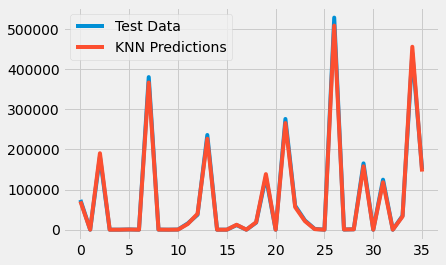

In [ ]:
knn_test_pred=knn_confirmed.predict(X_test_confirmed)
plt.plot(Y_test_confirmed)
plt.plot(knn_test_pred)
plt.legend(['Test Data','KNN Predictions'])
mse = math.sqrt(mean_squared_error(knn_test_pred, Y_test_confirmed)) 
print('Root mean square error', mse) 
mae = math.sqrt(mean_absolute_error(knn_test_pred, Y_test_confirmed)) 
print('Root mean absolute error', mae) 

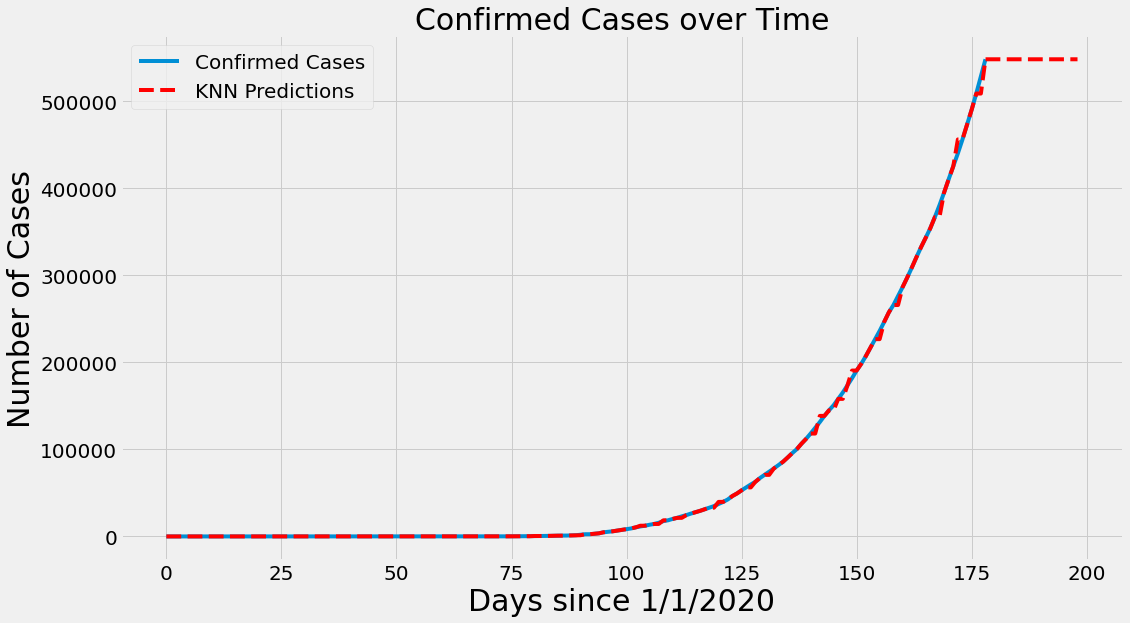

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,Y_confirmed)
plt.plot(future_forecast,knn_pred,linestyle='dashed',color='red')
plt.title('Confirmed Cases over Time',size=30)
plt.xlabel('Days since 1/1/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.legend(['Confirmed Cases','KNN Predictions'],prop={'size':20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
len(future_forecast_dates),len(knn_pred)

(199, 199)

In [ ]:
knn_df=pd.DataFrame({'Date':future_forecast_dates[-20:],'  KNN Predicted # number of Confirmed cases in India':np.round(knn_pred[-20:])})
knn_df

,Date,KNN Predicted # number of Confirmed cases in India
0,2020-06-28,548318
1,2020-06-29,548318
2,2020-06-30,548318
3,2020-07-01,548318
4,2020-07-02,548318
5,2020-07-03,548318
6,2020-07-04,548318
7,2020-07-05,548318
8,2020-07-06,548318
9,2020-07-07,548318


# ***Deaths***

In [ ]:
X_train_deaths,X_test_deaths,Y_train_deaths,Y_test_deaths=train_test_split(X,Y_deaths,test_size=0.2)

In [ ]:
knn_deaths=KNeighborsClassifier(n_neighbors=1,metric='minkowski',p=2)
knn_deaths.fit(X_train_deaths,Y_train_deaths)
knn_pred=knn_deaths.predict(future_forecast)

Root mean square error 367.74659149413685
Root mean absolute error 12.041594578792296


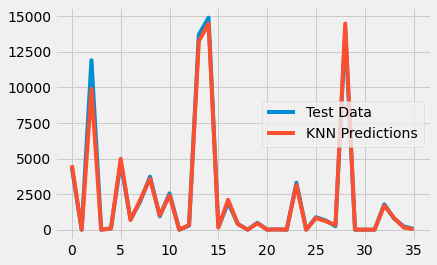

In [ ]:
knn_test_pred=knn_deaths.predict(X_test_deaths)
plt.plot(Y_test_deaths)
plt.plot(knn_test_pred)
plt.legend(['Test Data','KNN Predictions'])
mse = math.sqrt(mean_squared_error(knn_test_pred, Y_test_deaths)) 
print('Root mean square error', mse) 
mae = math.sqrt(mean_absolute_error(knn_test_pred, Y_test_deaths)) 
print('Root mean absolute error', mae) 

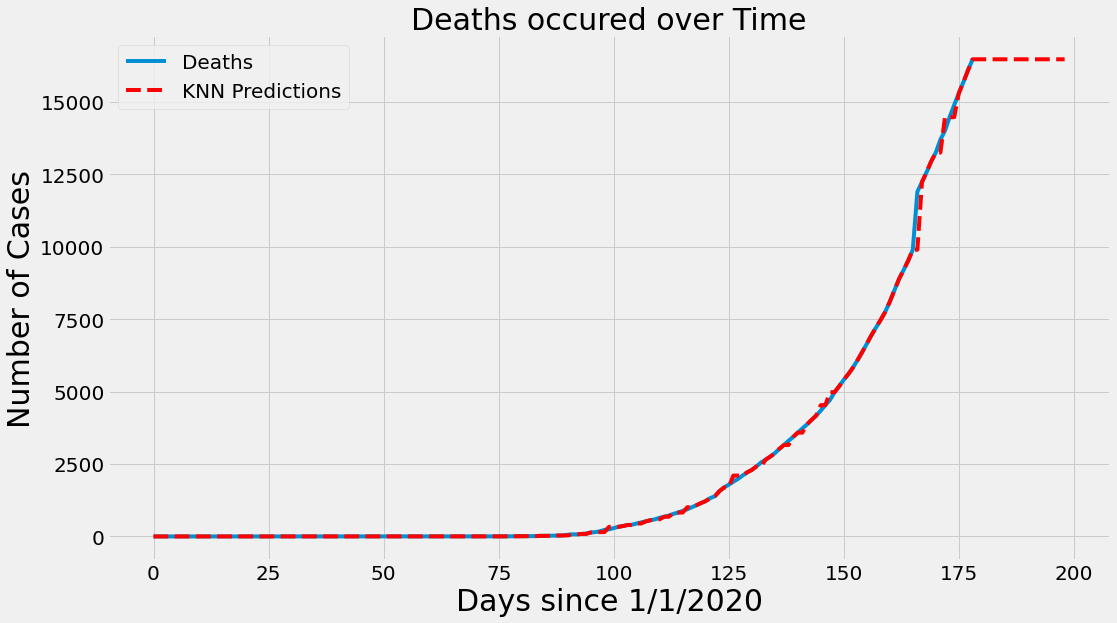

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,Y_deaths)
plt.plot(future_forecast,knn_pred,linestyle='dashed',color='red')
plt.title('Deaths occured over Time',size=30)
plt.xlabel('Days since 1/1/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.legend(['Deaths','KNN Predictions'],prop={'size':20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
knn_df=pd.DataFrame({'Date':future_forecast_dates[-20:],'  KNN Predicted # number of Deaths India':np.round(knn_pred[-20:])})
knn_df

,Date,KNN Predicted # number of Deaths India
0,2020-06-28,16475
1,2020-06-29,16475
2,2020-06-30,16475
3,2020-07-01,16475
4,2020-07-02,16475
5,2020-07-03,16475
6,2020-07-04,16475
7,2020-07-05,16475
8,2020-07-06,16475
9,2020-07-07,16475


# ***Recovered***

In [ ]:
X_train_recovered,X_test_recovered,Y_train_recovered,Y_test_recovered=train_test_split(X,Y_recovered,test_size=0.2)

In [ ]:
knn_recovered=KNeighborsClassifier(n_neighbors=1,metric='minkowski',p=2)
knn_recovered.fit(X_train_recovered,Y_train_recovered)
knn_pred=knn_recovered.predict(future_forecast)

Root mean square error 4118.253897790502
Root mean absolute error 44.55645607291695


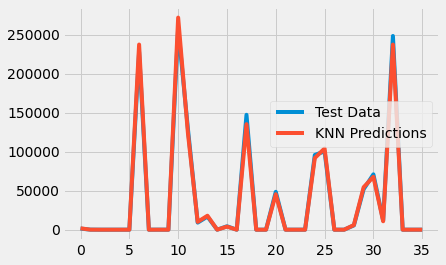

In [ ]:
knn_test_pred=knn_recovered.predict(X_test_recovered)
plt.plot(Y_test_recovered)
plt.plot(knn_test_pred)
plt.legend(['Test Data','KNN Predictions'])
mse = math.sqrt(mean_squared_error(knn_test_pred, Y_test_recovered)) 
print('Root mean square error', mse) 
mae = math.sqrt(mean_absolute_error(knn_test_pred, Y_test_recovered)) 
print('Root mean absolute error', mae) 

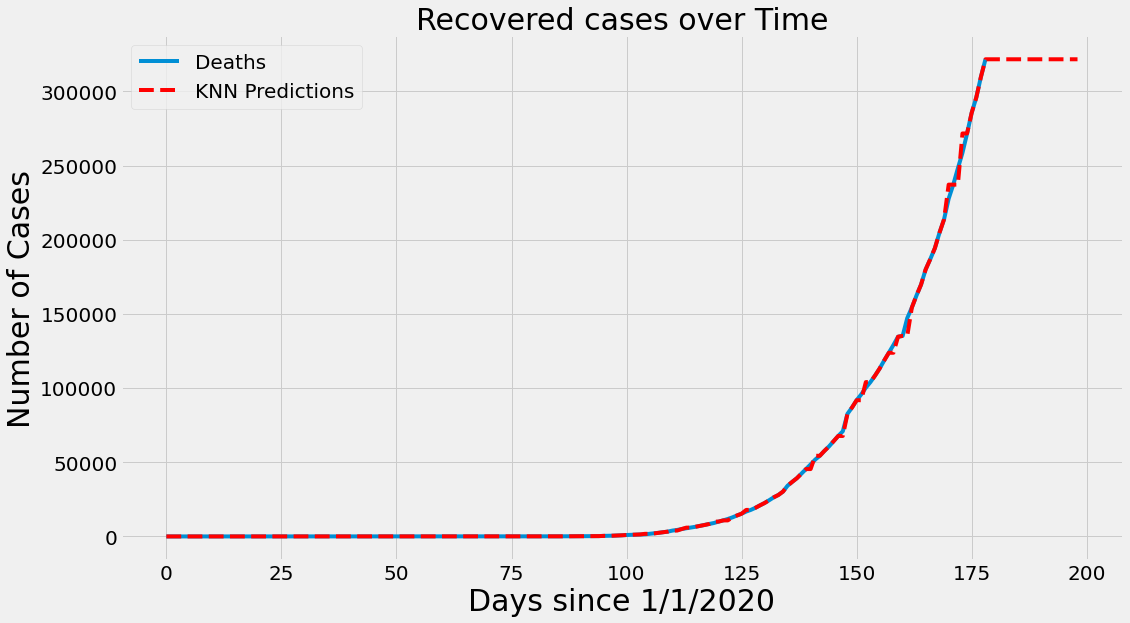

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,Y_recovered)
plt.plot(future_forecast,knn_pred,linestyle='dashed',color='red')
plt.title('Recovered cases over Time',size=30)
plt.xlabel('Days since 1/1/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.legend(['Deaths','KNN Predictions'],prop={'size':20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
knn_df=pd.DataFrame({'Date':future_forecast_dates[-20:],'  KNN Predicted # number of Recovered cases in India':np.round(knn_pred[-20:])})
knn_df

,Date,KNN Predicted # number of Recovered cases in India
0,2020-06-28,321723
1,2020-06-29,321723
2,2020-06-30,321723
3,2020-07-01,321723
4,2020-07-02,321723
5,2020-07-03,321723
6,2020-07-04,321723
7,2020-07-05,321723
8,2020-07-06,321723
9,2020-07-07,321723
